In [1]:
import h5py, sys, os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from datetime import datetime
print(os.getcwd())

%matplotlib ipympl

check = True

from jfunctions import *

/mhome/damtp/q/cwp29/diablo3/proc/jupyter


In [2]:
#Load simulation data
b, phi_v, phi_c, times = load_data('th1_xz', 'th2_xz', 'th3_xz')
    
NSAMP = len(times)

# Load simulation metadata
md = get_metadata()

# Get dir locations from param file
base_dir, run_dir, save_dir, version = read_params('./params.dat')
print(base_dir)

bbins, phivbins = load_bins_moist(save_dir, True)
bbins, phicbins = load_bins_moist(save_dir, False)

times, t0_idx = calibrate_time(save_dir, times)


# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

Keys: <KeysViewHDF5 ['B_xy', 'B_xz', 'B_yz', 'Ent_phic_flux_int', 'Ent_phic_flux_rec', 'Ent_phiv_flux_int', 'Ent_phiv_flux_rec', 'N2_xy', 'N2_xz', 'N2_yz', 'Re_b_xy', 'Re_b_xz', 'Re_b_yz', 'Ri_xy', 'Ri_xz', 'Ri_yz', 'b_phic_F1', 'b_phic_F3', 'b_phic_M', 'b_phic_S', 'b_phic_W', 'b_phic_mF1', 'b_phic_mF3', 'b_phic_sF3', 'b_phiv_F1', 'b_phiv_F2', 'b_phiv_M', 'b_phiv_S', 'b_phiv_W', 'b_phiv_mF1', 'b_phiv_mF2', 'chi1_xy', 'chi1_xz', 'chi1_yz', 'chi2_xy', 'chi2_xz', 'chi2_yz', 'chi3_xy', 'chi3_xz', 'chi3_yz', 'diff_th1_xy', 'diff_th1_xz', 'diff_th1_yz', 'diff_th2_xy', 'diff_th2_xz', 'diff_th2_yz', 'diff_th3_xy', 'diff_th3_xz', 'diff_th3_yz', 'epsilon_xy', 'epsilon_xz', 'epsilon_yz', 'kappa_t1_xy', 'kappa_t1_xz', 'kappa_t1_yz', 'kappa_t2_xy', 'kappa_t2_xz', 'kappa_t2_yz', 'kappa_t3_xy', 'kappa_t3_xz', 'kappa_t3_yz', 'nu_t_xy', 'nu_t_xz', 'nu_t_yz', 'omegaX_xy', 'omegaX_xz', 'omegaX_yz', 'omegaY_xy', 'omegaY_xz', 'omegaY_yz', 'omegaZ_xy', 'omegaZ_xz', 'omegaZ_yz', 'th1_xy', 'th1_xz', 'th1_yz',

In [3]:
print(md)

{'LX': 0.6, 'LY': 0.6, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 0.25, 'NU_START': 1e-09, 'SAVE_FLOW_DT': 5.0, 'VERSION': 3.12, 'NU_START_TIME': 5.0, 'r0': 0.002, 'alpha_e': 0.11, 'b0': 0.02, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.2, 'N2': 1.0, 'H': 0.2, 'b_factor': 0.25, 'phiv_factor': 0.7, 'phic_factor': 3.0, 'Nb': 128.0, 'Nphi': 128.0, 'F_TYPE': 3.0, 'alpha': 67.0, 'beta': 0.51, 'tau': 0.1, 'q0': 0.1, 'phiv_min': 0.0001, 'phic_min': 0.0001, 'T': 10.0, 'Trelax': 0.5, 'w_s': 0.01, 'INIT_NOISE': 1e-08, 'shear_rate': 0.2, 'Nx': 512, 'Ny': 512, 'Nz': 513, 'Nth': 3}


In [4]:
#Create grids
X, Y = np.meshgrid(gx, gz)
Xf, Yf = np.meshgrid(gxf, gzf)

db = bbins[1] - bbins[0]
dphiv = phivbins[1] - phivbins[0]
dphic = phicbins[1] - phicbins[0]

print("Total time steps: %s"%NSAMP)
print("Dimensional times: ",times)


Total time steps: 58
Dimensional times:  [-4.20119484 -3.95119484 -3.70119484 -3.45119484 -3.20119484 -2.95119484
 -2.70119484 -2.45119484 -2.20119484 -1.95119484 -1.70119484 -1.45119484
 -1.20119484 -0.95119484 -0.70119484 -0.45119484 -0.20119484  0.
  0.25        0.5         0.75        1.          1.25        1.5
  1.75        2.          2.25        2.5         2.75        3.
  3.25        3.5         3.75        4.          4.25        4.5
  4.75        5.          5.25        5.5         5.75        6.
  6.25        6.5         6.75        7.          7.25        7.5
  7.75        8.          8.25        8.5         8.75        9.
  9.25        9.5         9.75       10.        ]


In [5]:
# Non-dimensionalising
F0 = compute_F0(save_dir, md, tstart_ind = 2*4, verbose=False, zbot=0.7, ztop=0.95, plot=False, moist=True, vapour=True)
N = np.sqrt(md['N2'])
T = np.power(N, -1)
L = np.power(F0, 1/4) * np.power(N, -3/4)

# CURRENTLY OMITTED!

In [6]:
b_az, phiv_az, phic_az, w_az = load_az_data('b_az', 'phiv_az', 'phic_az', 'w_az')

Az keys: <KeysViewHDF5 ['b_az', 'bb_sfluc', 'p_az', 'phic_az', 'phiv_az', 'u_az', 'ub_sfluc', 'uu_sfluc', 'uv_sfluc', 'uw_sfluc', 'v_az', 'vv_sfluc', 'vw_sfluc', 'w_az', 'wb_sfluc', 'ww_sfluc']>


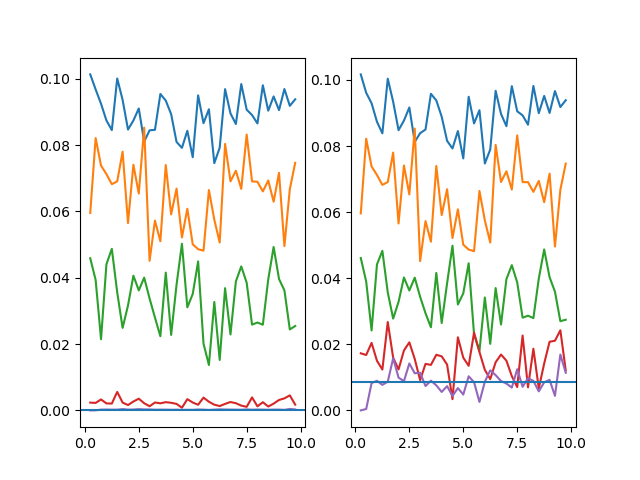

Saturation parameter:  1.2183758925446597


In [7]:
z_pen = md['H']

phiv_postpen = phiv_az[np.logical_and(times > 0, times < md['T']), :, :]
b_postpen = b_az[np.logical_and(times > 0, times < md['T']), :, :]

phiv_pen = np.mean(phiv_postpen[:, get_index(gzf, z_pen), 0])
b_pen = np.mean(b_postpen[:, get_index(gzf, z_pen), 0])

phi_vs_pen = md['q0']*np.exp(md['alpha']*(b_pen - md['beta']*z_pen))

sat_param = phiv_pen / phi_vs_pen

if check: 
    fig, ax = plt.subplots(1,2)
    for z in np.linspace(0, md['H'], 5):
        ax[0].plot(times[np.logical_and(times>0,times<md['T'])], phiv_postpen[:, get_index(gzf, z), 0])
        ax[1].plot(times[np.logical_and(times>0,times<md['T'])], b_postpen[:, get_index(gzf, z), 0])
    ax[0].axhline(phiv_pen)
    ax[1].axhline(b_pen)
    plt.show()

print("Saturation parameter: ", sat_param)

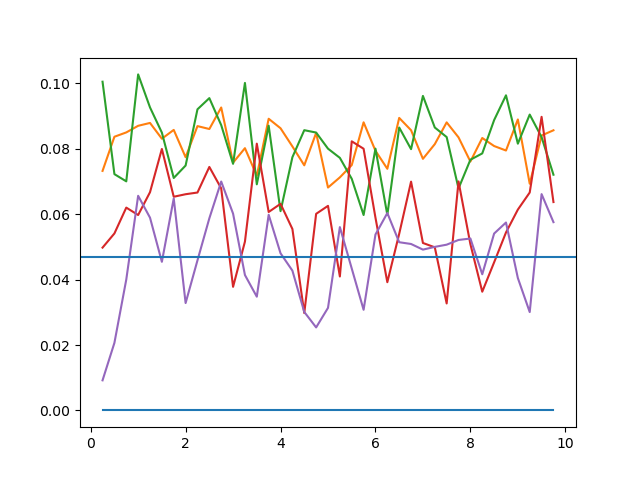

Sedimentation parameter:  4.705011203194989


In [8]:
w_postpen = w_az[np.logical_and(times > 0, times < md['T']), :, :]
w_pen = np.mean(w_postpen[:, get_index(gzf, z_pen), 0])

if check: 
    plt.figure()
    for z in np.linspace(0, md['H'], 5):
        plt.plot(times[np.logical_and(times>0,times<md['T'])], w_postpen[:, get_index(gzf, z), 0])
    plt.axhline(w_pen)
    plt.show()

sediment_param = w_pen/md['w_s']
print("Sedimentation parameter: ", sediment_param)

Shear parameter 2.664796833445849


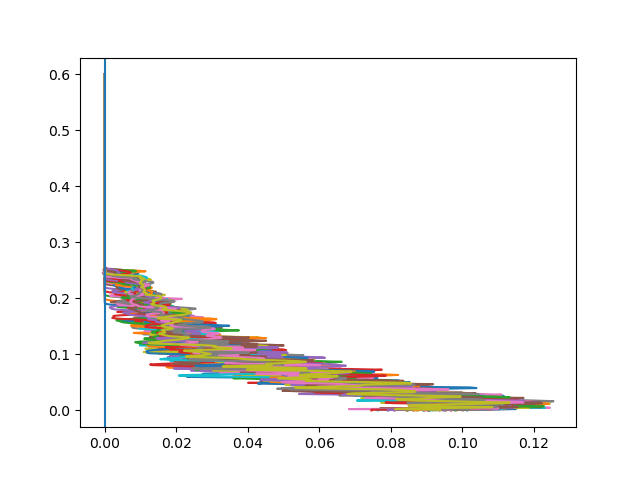

In [9]:
phic_postpen = phic_az[np.logical_and(times > 0, times < md['T']), :, :]
phic_pen = np.mean(phic_postpen[:, get_index(gzf, z_pen), 0])

phi_total = phic_postpen + phiv_postpen

dr = md['LX']/md['Nx']
nbins = int(md['Nx']/2)
r_bins = np.array([r*dr for r in range(0, nbins+1)])
r_points = np.array([0.5*(r_bins[i]+r_bins[i+1]) for i in range(nbins)])

X, Y = np.meshgrid(gzf, r_points, indexing='ij')

phi_nonzero = np.where(phi_total > 2*md['INIT_NOISE'], X, np.NaN)
zmax = np.nanmax(phi_nonzero)

T_dyn = (zmax-z_pen)/w_pen
print("Shear parameter", 1/(md['shear_rate']*T_dyn))

if check: 
    plt.figure()
    for i in range(len(w_postpen)):
        plt.plot(phi_total[i, :, 0], gzf)
        
    plt.axvline(2*md['INIT_NOISE'])
# calculate zmax